<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

In [26]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

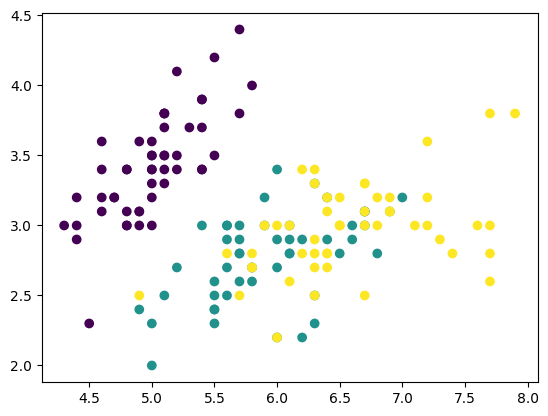

In [27]:
plt.scatter(X[:,0],X[:,1],c=y)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.cluster import KMeans

**ELBOW METHOD FOR K VALUE TO SELECT**

In [31]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

In [34]:
wcss

[399.99999999999994,
 143.99104679978905,
 85.6340487113328,
 70.77513284512952,
 54.88455277785804,
 49.30094652168764,
 41.81883540480074,
 37.15601120361683,
 31.289585596062846,
 27.929742329186272]

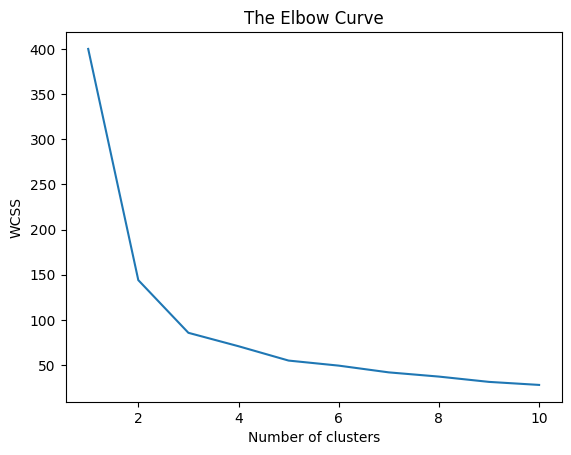

In [35]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
  kmeans=KMeans(n_clusters=3,init="k-means++")
  kmeans.fit_predict(X_train_scaled)

array([2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1], dtype=int32)

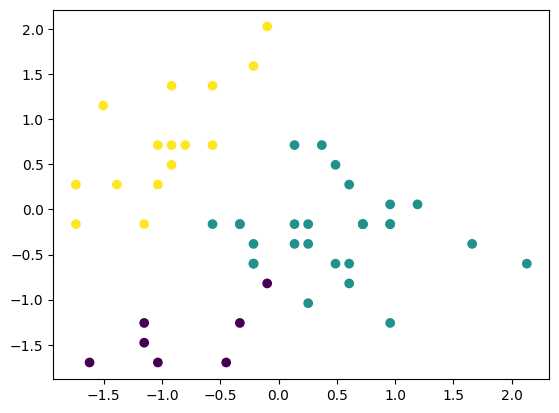

In [37]:
y_pred = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_pred)

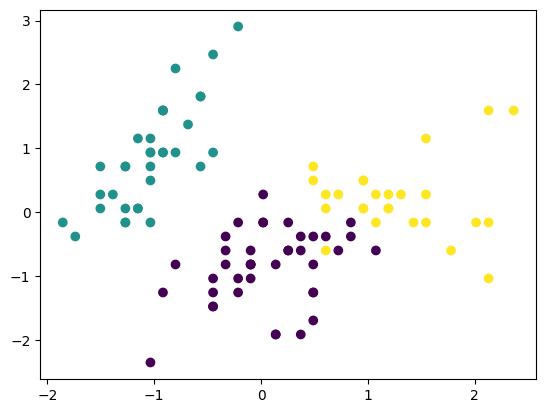

In [39]:
y_pred_i = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_pred_i)

In [40]:
#Kneelocator
!pip install kneed

In [41]:
from kneed import KneeLocator

np.int64(3)

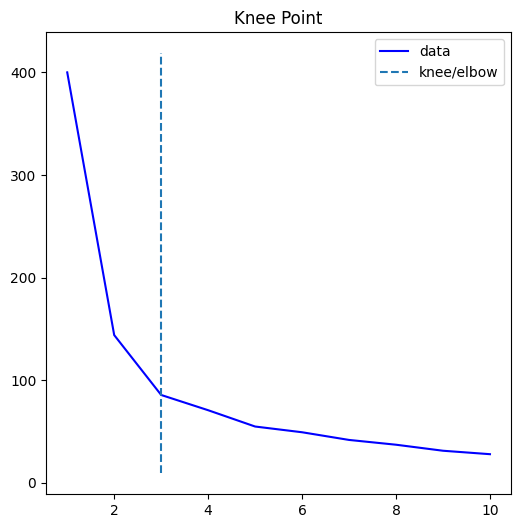

In [46]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.plot_knee()
kl.elbow

In [45]:
#silhoutte score
from sklearn.metrics import silhouette_score

In [47]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

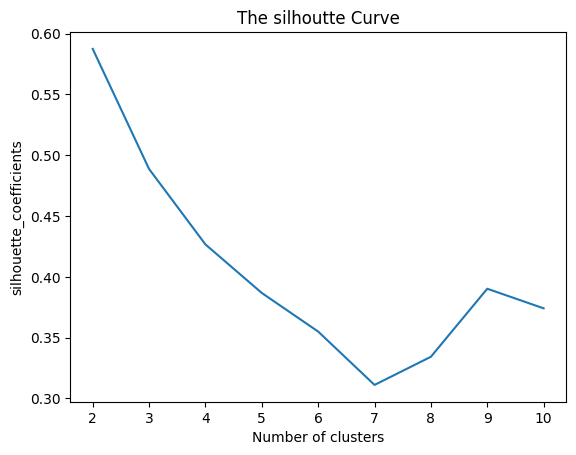

In [48]:
plt.plot(range(2,11),silhouette_coefficients)
plt.title('The silhoutte Curve')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()